<a href="https://colab.research.google.com/github/SamanMansoor/Data-Science/blob/main/ENB2012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# **Load Dataset**

In [2]:
data = pd.read_csv('/content/ENB2012_data.csv')
print(data.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [3]:
#rename features and targets

data.rename(columns={"X1": "Relative Compactness", "X2" :"Surface Area" ,"X3": "Wall Area","X4": "Roof Area", "X5":"Overall Height","X6" :"Orientation","X7": "Glazing Area","X8" : "Glazing Area Distribution","Y1": "Heating Load","Y2": "Cooling Load"},inplace=True)

# **Dataset Information**

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None


# **Statistical Summary**

In [5]:
print(data.describe())

       Relative Compactness  Surface Area   Wall Area   Roof Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall Height  Orientation  Glazing Area  Glazing Area Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000              

# **Data Preprocessing**

In [6]:
data.isnull()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

# **Hypothesis Testing**

In [40]:
from scipy.stats import pearsonr, ttest_rel

# Hypothesis Testing - Heating Load
# Null Hypothesis: There is no significant linear relationship
corr_heat, _ = pearsonr(data["Surface Area"], data["Heating Load"])
print(f"Correlation between Surface Area and Heating Load: {corr_heat}")

# Alternative Hypothesis: There is a significant linear relationship
if abs(corr_heat) > 0.5:  # Adjust the threshold as needed
    print("Reject Null Hypothesis: There is a significant linear relationship.")
else:
    print("Fail to reject Null Hypothesis: No significant linear relationship.")

# Hypothesis Testing - Cooling Load
# Null Hypothesis: There is no significant linear relationship
corr_cool, _ = pearsonr(data["Surface Area"], data["Cooling Load"])
print(f"Correlation between Surface Area and Cooling Load: {corr_cool}")

# Alternative Hypothesis: There is a significant linear relationship
if abs(corr_cool) > 0.5:  # Adjust the threshold as needed
    print("Reject Null Hypothesis: There is a significant linear relationship.")
else:
    print("Fail to reject Null Hypothesis: No significant linear relationship.")

# Model Comparison Hypothesis Testing
# Null Hypothesis: There is no significant difference between model performances
t_stat, p_value = ttest_rel(y_test_heat, y_pred_rf_heat)
print(f"P-value for model comparison: {p_value}")

# Alternative Hypothesis: There is a significant difference between model performances
if p_value < 0.05:  # Adjust the significance level as needed
    print("Reject Null Hypothesis: There is a significant difference between model performances.")
else:
    print("Fail to reject Null Hypothesis: No significant difference between model performances.")


Correlation between Surface Area and Heating Load: -0.6581202267776216
Reject Null Hypothesis: There is a significant linear relationship.
Correlation between Surface Area and Cooling Load: -0.6729989333544866
Reject Null Hypothesis: There is a significant linear relationship.
P-value for model comparison: 0.46750852647456254
Fail to reject Null Hypothesis: No significant difference between model performances.


# **Visualization**

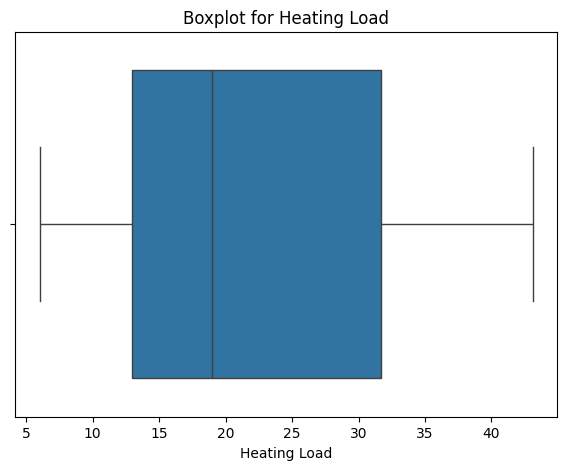

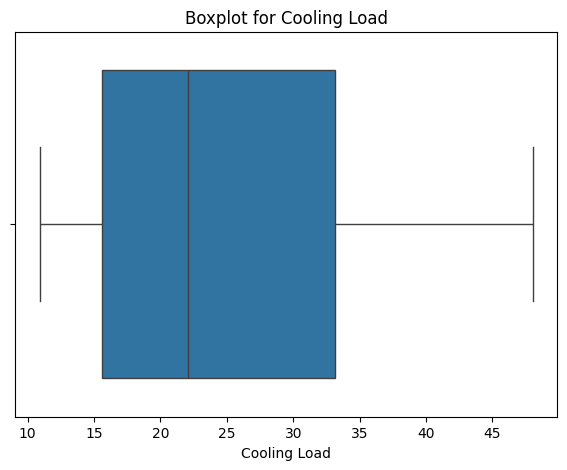

In [12]:
# Boxplot for Heating Load and Cooling Load
plt.figure(figsize=(7, 5))
sns.boxplot(x='Heating Load', data=data)
plt.title('Boxplot for Heating Load')
plt.show()

plt.figure(figsize=(7, 5))
sns.boxplot(x='Cooling Load', data=data)
plt.title('Boxplot for Cooling Load')
plt.show()

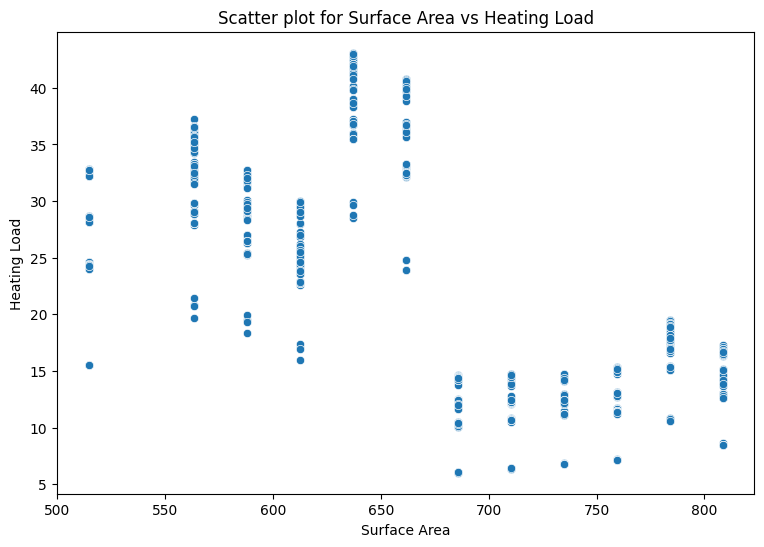

In [14]:
# Scatter plot for Surface Area vs Heating Load
plt.figure(figsize=(9, 6))
sns.scatterplot(x='Surface Area', y='Heating Load', data=data)
plt.title('Scatter plot for Surface Area vs Heating Load')
plt.show()

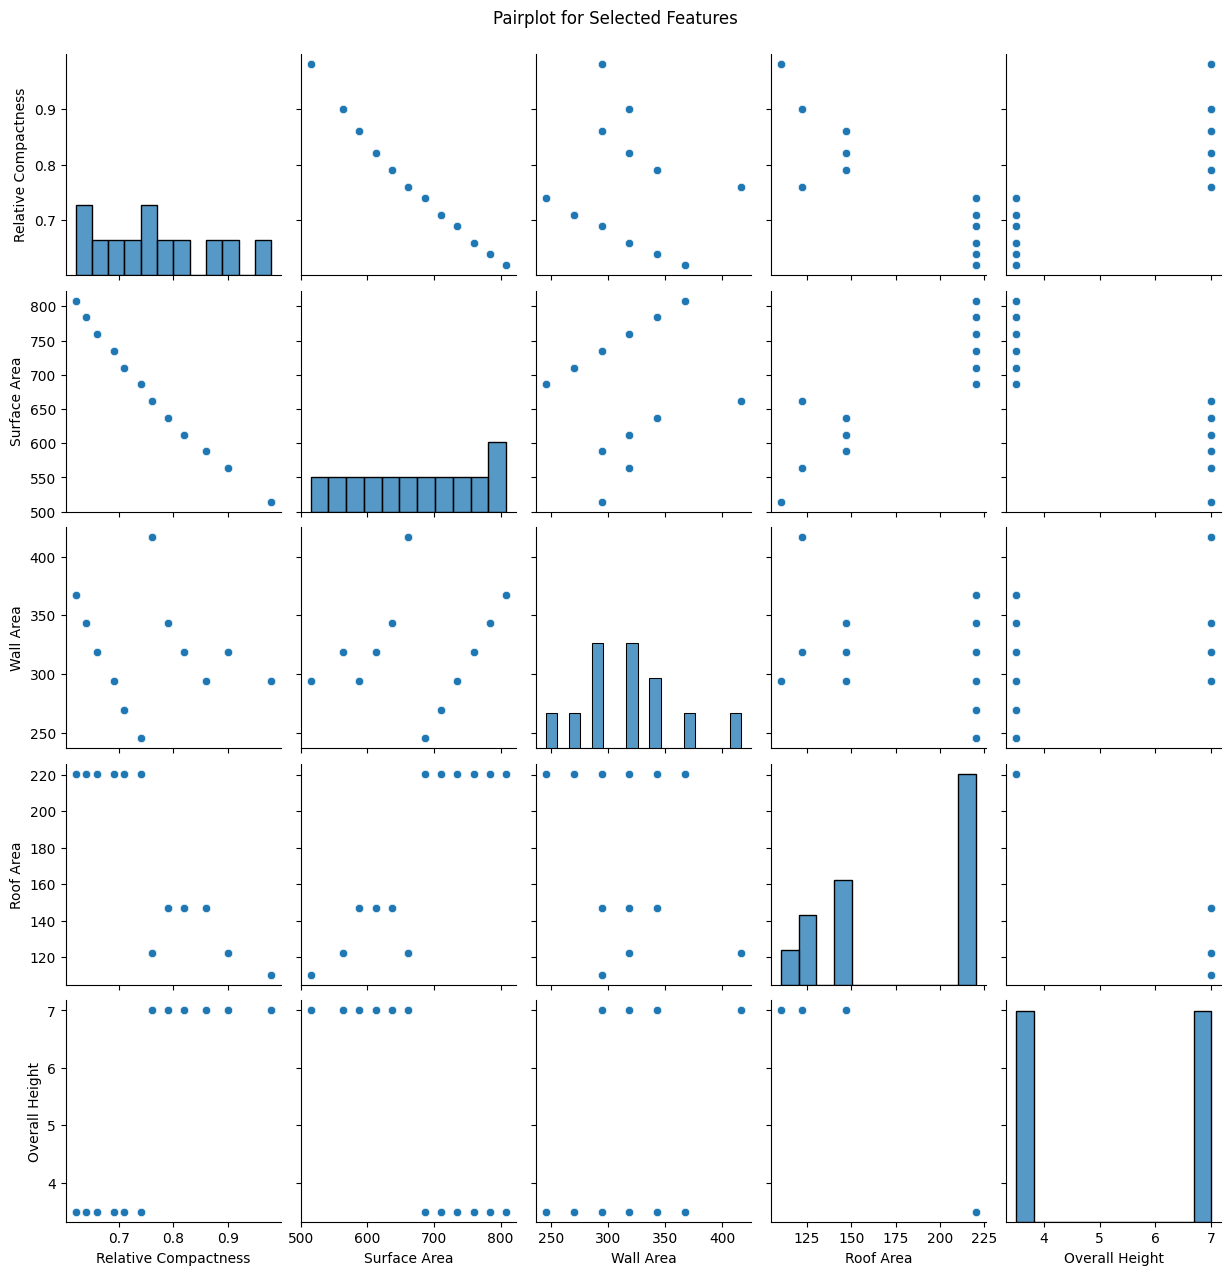

In [15]:
# Pairplot for selected features
selected_features = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height"]
sns.pairplot(data[selected_features])
plt.suptitle('Pairplot for Selected Features', y=1.02)
plt.show()

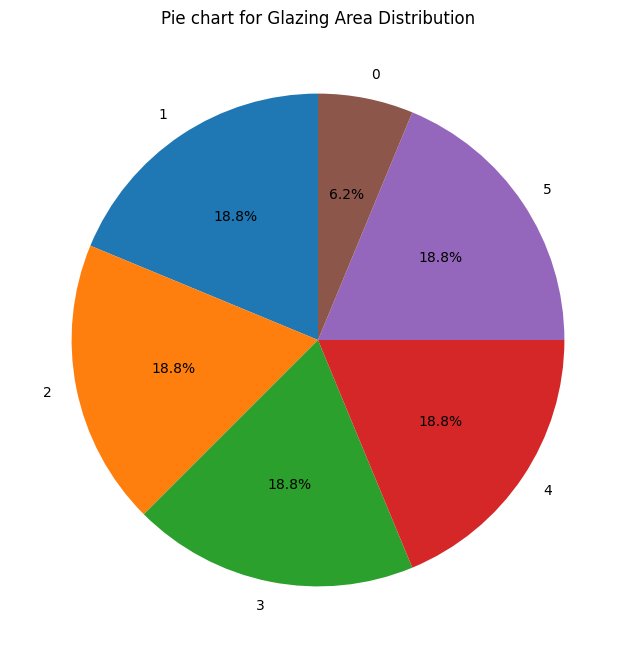

In [19]:
# Pie chart for Glazing Area Distribution
plt.figure(figsize=(8, 8))
labels = data['Glazing Area Distribution'].value_counts().index
sizes = data['Glazing Area Distribution'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie chart for Glazing Area Distribution')
plt.show()

# **Split the data into training and testing sets**

In [20]:
# Separate features (X) and target variable (y)
X = data.drop(['Heating Load', 'Cooling Load'], axis=1)
y_heat = data['Heating Load']
y_cool = data['Cooling Load']

# Split the data into training and testing sets
X_train_heat, X_test_heat, y_train_heat, y_test_heat = train_test_split(X, y_heat, test_size=0.2, random_state=42)
X_train_cool, X_test_cool, y_train_cool, y_test_cool = train_test_split(X, y_cool, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_heat_scaled = scaler.fit_transform(X_train_heat)
X_test_heat_scaled = scaler.transform(X_test_heat)

X_train_cool_scaled = scaler.fit_transform(X_train_cool)
X_test_cool_scaled = scaler.transform(X_test_cool)


# **Machine Learning Models**

In [22]:
# Import the necessary models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [23]:
# Heating Load model
heat_model = LinearRegression()
heat_model.fit(X_train_heat_scaled, y_train_heat)

LinearRegression()

In [24]:
cool_model = RandomForestRegressor()
cool_model.fit(X_train_cool_scaled, y_train_cool)

RandomForestRegressor()

In [25]:
# Heating Load model evaluation
heat_score = heat_model.score(X_test_heat_scaled, y_test_heat)
print(f"Heating Load Model R^2 Score: {heat_score}")

# Cooling Load model evaluation
cool_score = cool_model.score(X_test_cool_scaled, y_test_cool)
print(f"Cooling Load Model R^2 Score: {cool_score}")

Heating Load Model R^2 Score: 0.9099033202823223
Cooling Load Model R^2 Score: 0.9670708950649558


In [27]:
from xgboost import XGBRegressor
# Cooling Load model using XGBoost
cool_xgb_model = XGBRegressor()
cool_xgb_model.fit(X_train_cool_scaled, y_train_cool)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
# Cooling Load model (XGBoost) evaluation
cool_xgb_score = cool_xgb_model.score(X_test_cool_scaled, y_test_cool)
print(f"Cooling Load XGBoost Model R^2 Score: {cool_xgb_score}")

Cooling Load XGBoost Model R^2 Score: 0.9920496339941279


In [31]:
# Predictions for Linear Regression
y_pred_lr_heat = heat_model.predict(X_test_heat_scaled)
y_pred_lr_cool = cool_model.predict(X_test_cool_scaled)

# Predictions for RandomForestRegressor
y_pred_rf_heat = heat_model.predict(X_test_heat_scaled)
y_pred_rf_cool = cool_model.predict(X_test_cool_scaled)

# Predictions for XGBoost
y_pred_xgb_heat = heat_model.predict(X_test_heat_scaled)
y_pred_xgb_cool = cool_model.predict(X_test_cool_scaled)

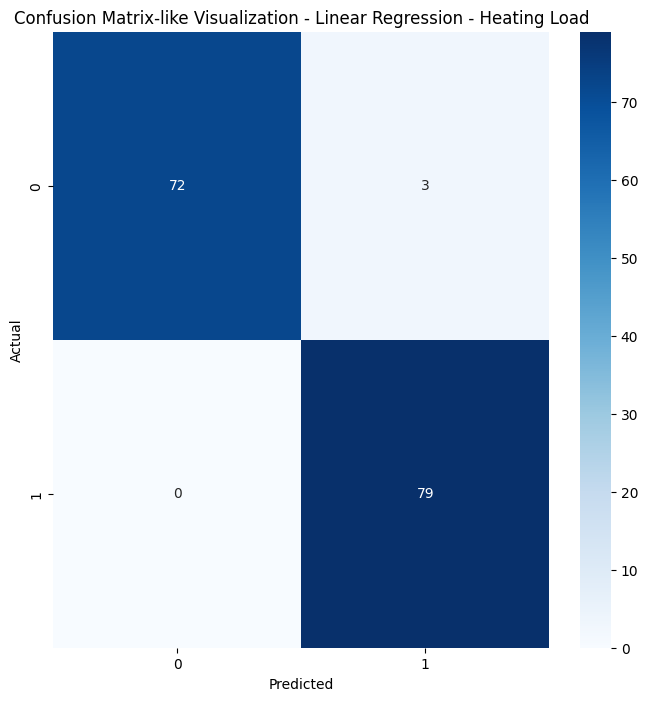

In [32]:
# Threshold for categorizing predictions
threshold_heat = 20  # You can adjust this threshold based on your problem

# Categorize predictions based on the threshold
y_pred_lr_heat_category = (y_pred_lr_heat > threshold_heat).astype(int)
y_test_heat_category = (y_test_heat > threshold_heat).astype(int)

# Confusion Matrix-like visualization for Linear Regression - Heating Load
plt.figure(figsize=(8, 8))
sns.heatmap(pd.crosstab(y_test_heat_category, y_pred_lr_heat_category, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix-like Visualization - Linear Regression - Heating Load')
plt.show()


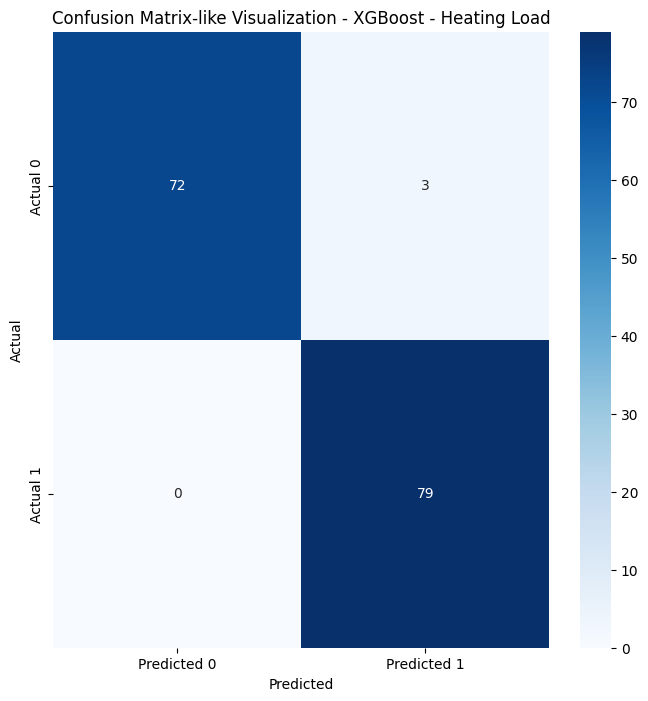

In [33]:
from sklearn.metrics import confusion_matrix

# Threshold for categorizing predictions
threshold_heat = 20  # You can adjust this threshold based on your problem

# Categorize predictions based on the threshold
y_pred_xgb_heat_category = (y_pred_xgb_heat > threshold_heat).astype(int)
y_test_heat_category = (y_test_heat > threshold_heat).astype(int)

# Confusion Matrix-like visualization for XGBoost - Heating Load
cm_xgb_heat = confusion_matrix(y_test_heat_category, y_pred_xgb_heat_category)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_xgb_heat, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix-like Visualization - XGBoost - Heating Load')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


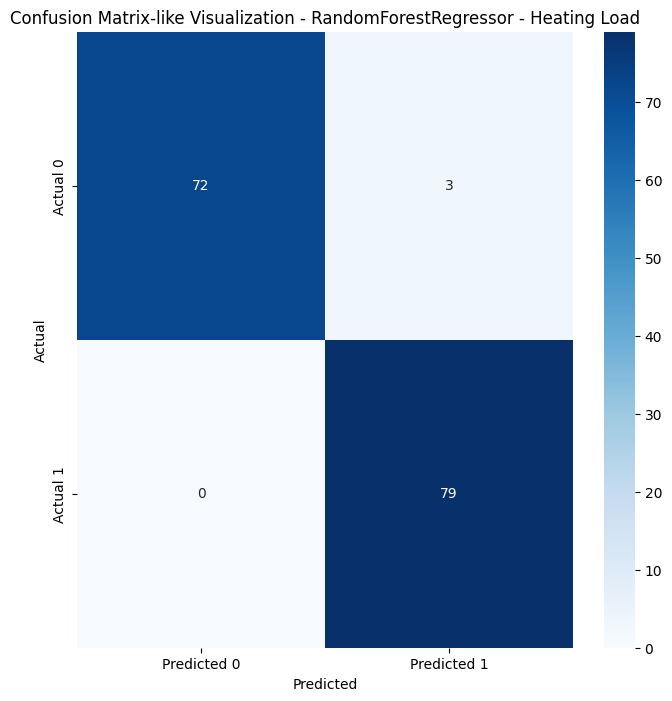

In [36]:
from sklearn.metrics import confusion_matrix

# Threshold for categorizing predictions
threshold_heat = 20  # You can adjust this threshold based on your problem

# Categorize predictions based on the threshold
y_pred_rf_heat_category = (y_pred_rf_heat > threshold_heat).astype(int)
y_test_heat_category = (y_test_heat > threshold_heat).astype(int)

# Confusion Matrix-like visualization for RandomForestRegressor - Heating Load
cm_rf_heat = confusion_matrix(y_test_heat_category, y_pred_rf_heat_category)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_rf_heat, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix-like Visualization - RandomForestRegressor - Heating Load')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


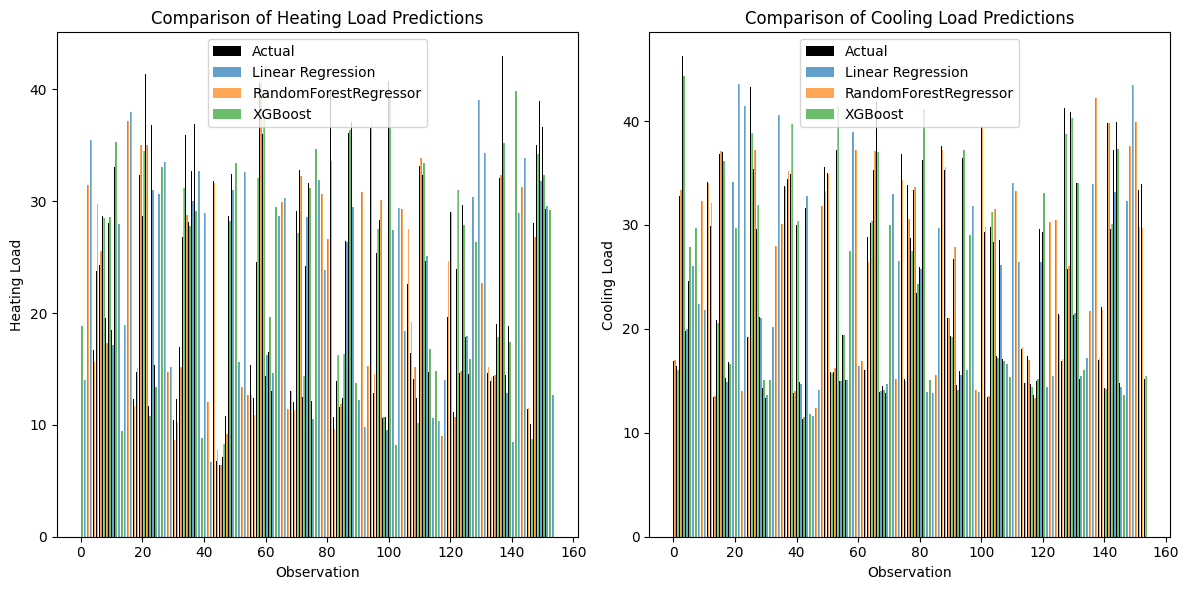

In [38]:
import numpy as np

# Create bar charts for Heating Load
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
bar_width = 0.2
index = np.arange(len(y_test_heat))

plt.bar(index, y_test_heat, width=bar_width, label='Actual', color='black')
plt.bar(index + bar_width, y_pred_lr_heat, width=bar_width, label='Linear Regression', alpha=0.7)
plt.bar(index + 2 * bar_width, y_pred_rf_heat, width=bar_width, label='RandomForestRegressor', alpha=0.7)
plt.bar(index + 3 * bar_width, y_pred_xgb_heat, width=bar_width, label='XGBoost', alpha=0.7)

plt.title('Comparison of Heating Load Predictions')
plt.xlabel('Observation')
plt.ylabel('Heating Load')
plt.legend()

# Create bar charts for Cooling Load
plt.subplot(1, 2, 2)

plt.bar(index, y_test_cool, width=bar_width, label='Actual', color='black')
plt.bar(index + bar_width, y_pred_lr_cool, width=bar_width, label='Linear Regression', alpha=0.7)
plt.bar(index + 2 * bar_width, y_pred_rf_cool, width=bar_width, label='RandomForestRegressor', alpha=0.7)
plt.bar(index + 3 * bar_width, y_pred_xgb_cool, width=bar_width, label='XGBoost', alpha=0.7)

plt.title('Comparison of Cooling Load Predictions')
plt.xlabel('Observation')
plt.ylabel('Cooling Load')
plt.legend()

plt.tight_layout()
plt.show()
